In [1]:
import os
import pandas as pd
import numpy as np

def load_titanic_data(filename, folder="Data"):
    csv_path = os.path.join(folder, filename)
    return pd.read_csv(csv_path)

In [2]:
titanic_train = load_titanic_data("train.csv")
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


So initial lessons to learn:
Age has over 150 missing values which is significant in this dataset size
Cabin has 22% population which is very poor could initially transform into a new column of has cabin which is binary, not sure if a location from cabin can be gleaned to help predict survival rates based on where in the ship passengers had cabins? Maybe those with cabins could be more likely to have been in them at the time of sinking?

Need to remove PassengerId from training process

Only numerical fields which are related numerical - age and fare. The rest are categorical

In [4]:
204/891 * 100 #Cabin population rate

22.895622895622896

In [5]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


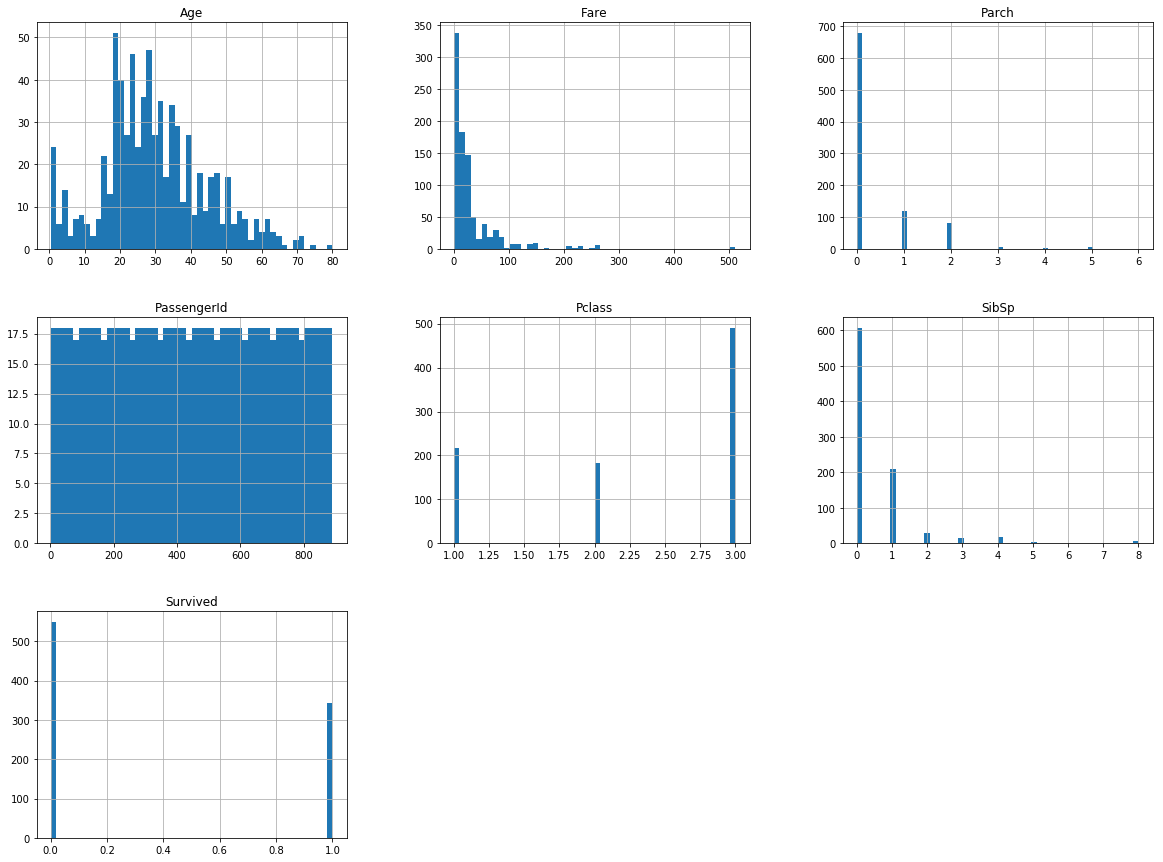

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
titanic_train.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [71]:
t = titanic_train.copy()
#train_set, test_set = split_train_test(t, 0.2)

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(t, test_size=0.2, random_state=42)

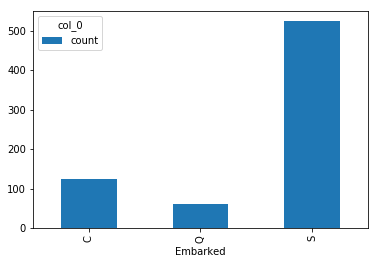

In [9]:
my_tab = pd.crosstab(index = train_set["Embarked"], columns=["count"])
my_tab.plot.bar()

In [10]:
def plot_survival_per_feature(data, feature):
    grouped_by_survival = data[feature].groupby(data["Survived"])
    survival_per_feature = pd.DataFrame({"Survived": grouped_by_survival.get_group(1),
                                        "didnt_Survived": grouped_by_survival.get_group(0),
                                        })
    hist = survival_per_feature.plot.hist(bins=20, alpha=0.6)
    hist.set_xlabel(feature)
    plt.show()

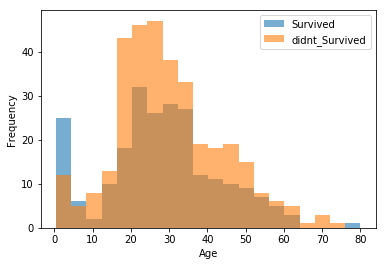

In [11]:
plot_survival_per_feature(train_set, "Age")

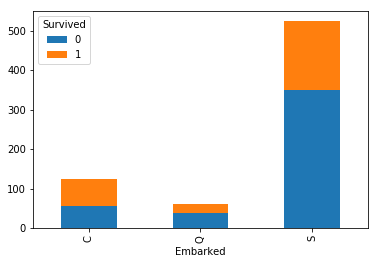

In [12]:
train_set.groupby(["Embarked", "Survived"])["Embarked"].count().unstack("Survived").fillna(0).plot(kind="bar", stacked = True)

In [13]:
def SurvivalStackedPerFeature(data, feature):
    data.groupby([feature, "Survived"])[feature].count().unstack("Survived").fillna(0).plot(kind="bar", stacked = True)

In [14]:
def AddHasCabin(data):
    data["HasCabin"] = data["Cabin"]
    data["HasCabin"] = data["HasCabin"].fillna(value=0)
    data.loc[data["HasCabin"] != 0, "HasCabin"] = 1
#SurvivalStackedPerFeature(t, "Cabin")

C:\Users\NickSandel\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\NickSandel\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\NickSandel\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

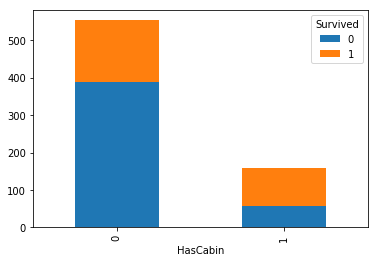

In [15]:
#t = pd.DataFrame(titanic_train.copy())
AddHasCabin(train_set)
#t[["Cabin","HasCabin"]]
SurvivalStackedPerFeature(train_set, "HasCabin")
#A far higher proportion of those with Cabins survived than without

In [91]:
#Perhpahs some correlation for married women and can also use miss and master to infer younger people when calculating their age
def AddTitle(data):
    data["Mr"] = 0
    data["Mrs"] = 0
    data["Master"] = 0
    data["Miss"] = 0
    data["Other"] = 0
    data.loc[data["Name"].str.contains("Mr."), "Mr"] = 1
    data.loc[data["Name"].str.contains("Mrs."), "Mrs"] = 1
    data.loc[data["Name"].str.contains("Master."), "Master"] = 1
    data.loc[data["Name"].str.contains("Miss."), "Miss"] = 1
    data.loc[data["Mr"] + data["Mrs"] + data["Master"] + data["Miss"] == 0, "Other"] = 1
    
class AddTitleAdder(BaseEstimator, TransformerMixin):
    def __init__(self, nothing=""): # no *args or **kargs
        self.nothing = nothing
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        X["Mr"] = 0
        X["Mrs"] = 0
        X["Master"] = 0
        X["Miss"] = 0
        X["Other"] = 0
        X.loc[X["Name"].str.contains("Mr."), "Mr"] = 1
        X.loc[X["Name"].str.contains("Mrs."), "Mrs"] = 1
        X.loc[X["Name"].str.contains("Master."), "Master"] = 1
        X.loc[X["Name"].str.contains("Miss."), "Miss"] = 1
        X.loc[X["Mr"] + X["Mrs"] + X["Master"] + X["Miss"] == 0, "Other"] = 1
        return np.c_[X,"Mr","Mrs","Master","Miss","Other"]
        #rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        #population_per_household = X[:, population_ix] / X[:, household_ix]
        #if self.add_bedrooms_per_room:
         #   bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
          #  return np.c_[X, rooms_per_household, population_per_household,
           #              bedrooms_per_room]
        #else:
         #   return np.c_[X, rooms_per_household, population_per_household]
    
AddTitle(train_set)

C:\Users\NickSandel\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\NickSandel\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\NickSandel\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value 

In [57]:
train_titles = train_set["Title"]
train_titles_encoded, train_title_categories = train_titles.factorize()
print(train_titles_encoded[:10])
print(train_title_categories)

[0 0 0 0 1 0 2 0 0 0]
Index(['Mr', 'Miss', 'Other', 'Mrs', 'Master'], dtype='object')


In [58]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
train_titles_1hot = encoder.fit_transform(train_titles_encoded.reshape(-1,1))
train_titles_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [73]:
titanic_num = train_set.drop(["Name","Sex","Ticket","Cabin","Embarked"], axis=1)


In [92]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_attribs = list(titanic_num)
cat_attribs = ["Sex"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    #('add_cabin', AddHasCabin()), 
    ('add_titles', AddTitleAdder()), 
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder()),
])

from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    #("cat_pipeline", cat_pipeline),
])
train_set2, test_set2 = train_test_split(t, test_size=0.2, random_state=42)
train_labels2 = train_set2["Survived"]
train_set2.drop("Survived",axis=1)
titanic_prepared = full_pipeline.fit_transform(train_set2)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [80]:
sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(titanic_prepared, train_labels2)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [82]:
cross_val_score(sgd_clf, titanic_prepared, train_labels2, cv=3, scoring="accuracy")

array([1., 1., 1.])

In [85]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(titanic_prepared, train_labels2)
cross_val_score(forest_clf, titanic_prepared, train_labels2, cv=3, scoring="accuracy")

array([1., 1., 1.])

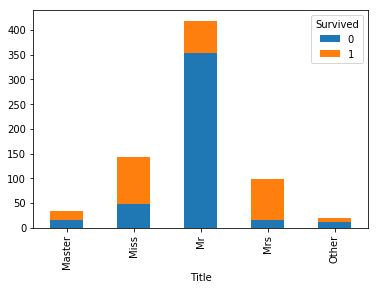

In [17]:
SurvivalStackedPerFeature(train_set, "Title")
#Surprising proportion of masters. Must remember though that miss can be older ladies as well

In [65]:
train_set.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [19]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 14 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            572 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Cabin          159 non-null object
Embarked       710 non-null object
HasCabin       712 non-null int64
Title          712 non-null object
dtypes: float64(2), int64(6), object(6)
memory usage: 103.4+ KB


In [20]:
train_labels = train_set["Survived"]
train_labels
train_set.drop("Survived",axis=1)
train_set_X = train_set.loc[:,["Pclass","Age", "SibSp", "Parch", "Fare", "HasCabin"]]

from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")
imputer.fit(train_set_X)
train_set_X = imputer.transform(train_set_X)
train_set_X

array([[  1.    ,  45.5   ,   0.    ,   0.    ,  28.5   ,   1.    ],
       [  2.    ,  23.    ,   0.    ,   0.    ,  13.    ,   0.    ],
       [  3.    ,  32.    ,   0.    ,   0.    ,   7.925 ,   0.    ],
       ...,
       [  3.    ,  41.    ,   2.    ,   0.    ,  14.1083,   0.    ],
       [  1.    ,  14.    ,   1.    ,   2.    , 120.    ,   1.    ],
       [  1.    ,  21.    ,   0.    ,   1.    ,  77.2875,   1.    ]])

In [21]:
#Let's try some classification on this bad boy! See if it just fails with missing fields and non-numeric values eh?
#Yes it's useless with text so always need to change to numeric and remove NaN fields
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(train_set_X, train_labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(train_set_X, train_labels):
    clone_clf = clone(sgd_clf)
    X_train_folds = train_set_X[train_index]
    y_train_folds = train_labels[train_index]
    X_test_fold = train_set_X[test_index]
    y_test_fold = train_labels[test_index]
    
    print(X_train_folds[227])
    print(y_train_folds[227])
    print(len(X_train_folds))
    print(len(y_train_folds))
    print(train_set_X[227])
    print(train_labels[227])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

C:\Users\NickSandel\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\pandas\core\series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


[ 2.     22.      1.      2.     41.5792  0.    ]
nan
474
474
[  1.     23.      1.      0.    113.275   1.   ]


KeyError: 227

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, train_set_X, train_labels, cv=3, scoring="accuracy")

array([0.69747899, 0.6371308 , 0.62447257])

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(train_set_X, train_labels)
#y_probas_forest = cross_val_predict(forest_clf, train_set_X, train_labels, cv=3, method="predict_proba")
cross_val_score(forest_clf, train_set_X, train_labels, cv=3, scoring="accuracy")

array([0.69747899, 0.66244726, 0.67510549])

In [ ]:
#Yay I ran 2 classifiers! Which clearly show there's more work to be done in preparing the data!
#Next steps: could look at ROC curves and the other metrics from MNIST binary classifier learning
#Then go back and figure out what to do with the other categorical fields